In [27]:
import numpy as np
import matplotlib.pyplot as plt

Генерируем выборку quantity = 100

In [58]:
teta = 25
beta = 0.95
quantity = 100
selection = np.random.uniform(teta, 2 * teta, quantity)

print(selection)

[40.42060452 27.85818849 36.73081764 35.3836973  31.90891841 41.17191616
 37.54228291 29.15718057 38.67591726 48.77082673 35.58147575 32.63610575
 32.01941923 47.73002514 30.85354083 37.18608954 30.56216181 35.48613218
 36.61130398 30.90295238 44.74848028 26.34239995 46.45075861 27.07698515
 27.37039369 32.99646119 44.30340995 32.39697044 47.03391476 47.01250823
 39.93622018 36.70252095 28.63388104 49.81817684 36.54347097 26.60155353
 29.26279701 41.09564022 39.63769777 43.8984199  37.42879515 36.89176701
 38.10765421 48.79344879 37.88054927 25.95600784 28.10350456 38.23428277
 29.89328852 29.10564588 36.41450886 45.90046405 39.55555341 28.48760395
 42.97276258 49.88023308 32.70751486 35.55065058 47.39880953 44.39149388
 31.35528238 39.63455435 46.00957779 29.69491412 47.05017033 47.4941993
 36.67191275 46.71297259 49.71836513 26.33039423 31.2602438  40.10206604
 33.96821378 47.74731646 35.36944009 36.14467102 27.14735135 44.15370231
 47.77315367 45.50628576 32.43303884 43.56774152 26.

In [59]:
def alpha_1(selection):
    return sum(selection)/quantity
def alpha_2(selection):
    return sum(selection ** 2)/quantity

In [60]:
def get_bootstrap_sample(x, B_sample = 1000):
    N = len(x)
    result = list()
    for i in range (B_sample):
        sample = np.random.choice(x, size = N, replace = True)
        if (B_sample == 1):
            sample = sample.T[0]
        result.append(sample)
    return result

#f) Вычисляем доверительные интервалы для доверительной вероятности 0.95

Точный доверительный интервал

In [61]:
def exact_confidence_interval(selection, beta = 0.95):
    left_part = max(selection) / (((1 + beta) / 2) ** (1/quantity) + 1)
    right_part = max(selection) / (((1 - beta) / 2) ** (1/quantity) + 1)
    print('Точный доверительный интервал: ', left_part,'< teta <', right_part)
    print('Длина точного доверительного интервала: ', right_part - left_part)
    return left_part, right_part
exact_confidence_interval(selection)

Точный доверительный интервал:  24.94327368651881 < teta < 25.400069801714565
Длина точного доверительного интервала:  0.456796115195754


(24.94327368651881, 25.400069801714565)

Асимптотический доверительный интервал

In [62]:
def asymptotic_confidence_interval_OMM(selection, beta):
    left_part = -1.96 * 2/3 * (alpha_2(selection) - alpha_1(selection) ** 2) ** (1/2) / (quantity) ** (1/2) + 2/3 * np.mean(selection)
    right_part = 1.96 * 2/3 * (alpha_2(selection) - alpha_1(selection) ** 2) ** (1/2) / (quantity) ** (1/2) + 2/3 * np.mean(selection)
    print('Асимптотический доверительный интервал: ', left_part, '< teta <', right_part)
    print('Длина асимптотического доверительного интервала: ', right_part - left_part)
    return left_part, right_part
asymptotic_confidence_interval_OMM(selection, beta)

Асимптотический доверительный интервал:  23.992126671650418 < teta < 25.87705207650682
Длина асимптотического доверительного интервала:  1.8849254048564035


(23.992126671650418, 25.87705207650682)

#g) Строим бутстраповский доверительный интервал

Бутстраповский непараметрический доверительный интервал для teta_1 = (2/3) * x_ср

In [63]:
def bootstrap_OMM_nonparametric(selection):
    real_mean = 2/3 * selection.mean()
    current_selection = np.array(get_bootstrap_sample(selection))
    bootstrap_mean = list()
    for i in range(1000):
        bootstrap_mean.append(2/3 * current_selection[i].mean())
    bootstrap_mean = np.array(bootstrap_mean)
    delta = bootstrap_mean - real_mean
    delta.sort()
    k1 = 24
    k2 = 974
    left_part = real_mean - delta[k2]
    right_part = real_mean - delta[k1]
    print('Бутстраповский непараметрический доверительный интервал: ', left_part, '< teta <', right_part)
    print('Длина бутстраповского непараметрического доверительного интервала: ', right_part - left_part)
    return left_part, right_part
bootstrap_OMM_nonparametric(selection)

Бутстраповский непараметрический доверительный интервал:  24.011001066367097 < teta < 25.833794226765647
Длина бутстраповского непараметрического доверительного интервала:  1.8227931603985503


(24.011001066367097, 25.833794226765647)

Бутстраповский параметрический доверительный интервал для teta_1 = (2/3) * x_ср

In [64]:
def bootstrap_OMM_parametric(selection):
    real_mean = 2/3 * selection.mean()
    teta = real_mean
    quantity = 100
    current_selection = list()
    current_selection_grade = list()
    for i in range(50000):
        current_selection.append(np.random.uniform(teta, 2 * teta, quantity))
        current_selection_grade.append(2 / 3 * current_selection[i].mean())
    current_selection = np.array(current_selection)
    current_selection_grade = np.array(current_selection_grade)
    current_selection_grade.sort()
    k1 = 1249
    k2 = 48749
    left_part = current_selection_grade[k1]
    right_part = current_selection_grade[k2]
    print('Бутстраповский параметрический доверительный интервал: ', left_part, '< theta <', right_part)
    print('Длина параметрический бутстраповского доверительного интервала: ', right_part - left_part)
    return left_part, right_part
bootstrap_OMM_parametric(selection)

Бутстраповский параметрический доверительный интервал:  24.000085718175214 < theta < 25.873998617512232
Длина параметрический бутстраповского доверительного интервала:  1.873912899337018


(24.000085718175214, 25.873998617512232)

Бутстраповский непараметрический доверительный интервал для teta_2 = x_max / 2

In [65]:
def bootstrap_OMP_nonparametric(selection):
    real_max = 1/2 * max(selection)
    current_selection = np.array(get_bootstrap_sample(selection))
    bootstrap_max = list()
    for i in range(1000):
        bootstrap_max.append(1/2 * current_selection[i].max())
    bootstrap_max = np.array(bootstrap_max)
    delta = bootstrap_max - real_max
    delta.sort()
    k1 = 24
    k2 = 974
    right_part = real_max - delta[k1]
    left_part = real_max - delta[k2]
    print('Бутстраповский непараметрический доверительный интервал: ', left_part, '< teta <', right_part)
    print('Длина бутстраповского непараметрического доверительного интервала: ', right_part - left_part)
    return left_part, right_part
bootstrap_OMP_nonparametric(selection)

Бутстраповский непараметрический доверительный интервал:  24.940116541127203 < teta < 25.29592006927147
Длина бутстраповского непараметрического доверительного интервала:  0.35580352814426774


(24.940116541127203, 25.29592006927147)

Бутстраповский параметрический доверительный интервал для teta_2 = x_max / 2



In [66]:
def bootstrap_OMP_parametric(selection):
    real_max = 1/2 * max(selection)
    teta = real_max
    quantity = 100
    currunt_selection = list()
    currunt_selection_grade = list()
    for i in range(50000):
        currunt_selection.append(np.random.uniform(teta, 2 * teta, quantity))
        currunt_selection_grade.append(1 / 2 * currunt_selection[i].max())
    currunt_selection = np.array(currunt_selection)
    currunt_selection_grade = np.array(currunt_selection_grade)
    currunt_selection_grade.sort()
    k1 = 1249
    k2 = 48749
    right_part = currunt_selection_grade[k2]
    left_part = currunt_selection_grade[k1]
    print('Бутстраповский параметрический доверительный интервал: ', left_part, '< teta <', right_part)
    print('Длина бутстраповского параметрического доверительного интервала: ', right_part - left_part)
    return left_part, right_part
bootstrap_OMP_parametric(selection)

Бутстраповский параметрический доверительный интервал:  24.490254514985338 < teta < 24.936830625847747
Длина бутстраповского параметрического доверительного интервала:  0.44657611086240934


(24.490254514985338, 24.936830625847747)

#h) Сравниваем получившиеся интервалы

Точный доверительный интервал:  24.94327368651881 < teta < 25.400069801714565
Длина точного доверительного интервала:  0.456796115195754
Асимптотический доверительный интервал:  23.992126671650418 < teta < 25.87705207650682
Длина асимптотического доверительного интервала:  1.8849254048564035
Бутстраповский параметрический доверительный интервал:  23.992331689051614 < theta < 25.877195604800963
Длина параметрический бутстраповского доверительного интервала:  1.8848639157493494
Бутстраповский непараметрический доверительный интервал:  23.911110948206655 < teta < 25.87651163146617
Длина бутстраповского непараметрического доверительного интервала:  1.9654006832595137
Бутстраповский параметрический доверительный интервал:  24.488767076934998 < teta < 24.936963627839308
Длина бутстраповского параметрического доверительного интервала:  0.44819655090431
Бутстраповский непараметрический доверительный интервал:  24.940116541127203 < teta < 25.29592006927147
Длина бутстраповского непараметрическо

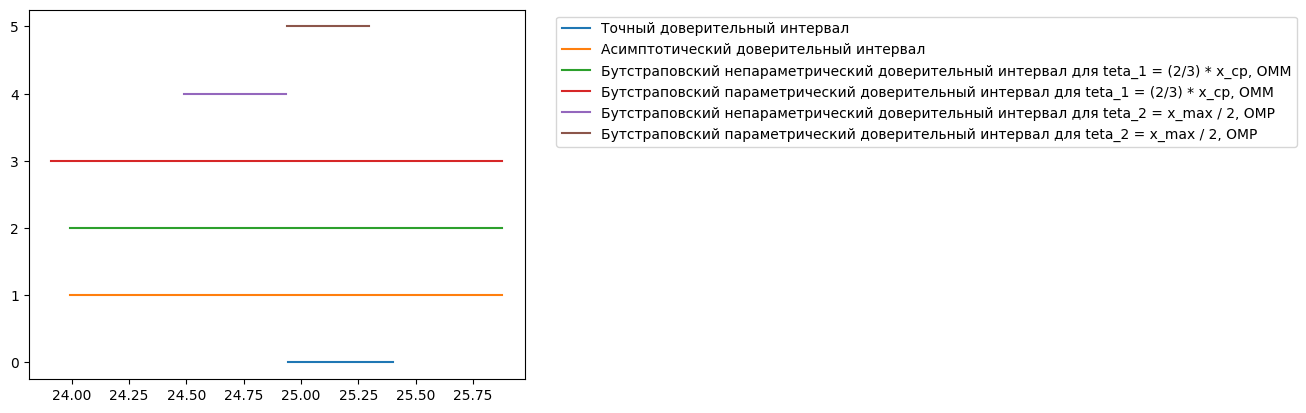

In [67]:
plt.plot(exact_confidence_interval(selection), (0, 0), label= "Точный доверительный интервал")
plt.plot(asymptotic_confidence_interval_OMM(selection, beta), (1, 1), label= "Асимптотический доверительный интервал")
plt.plot(bootstrap_OMM_parametric(selection), (2, 2), label= "Бутстраповский непараметрический доверительный интервал для teta_1 = (2/3) * x_ср, OMM")
plt.plot(bootstrap_OMM_nonparametric(selection), (3, 3), label = "Бутстраповский параметрический доверительный интервал для teta_1 = (2/3) * x_ср, OMM")
plt.plot(bootstrap_OMP_parametric(selection), (4, 4), label= "Бутстраповский непараметрический доверительный интервал для teta_2 = x_max / 2, OMP")
plt.plot(bootstrap_OMP_nonparametric(selection), (5, 5), label= "Бутстраповский параметрический доверительный интервал для teta_2 = x_max / 2, OMP")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')